In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tf_perturb.self_healing_new import SelfRepairConfigNew, SelfRepairPipelineNew

In [4]:
config = SelfRepairConfigNew(
    model_name="pythia-160m",
    dataset_name="pile",
    batch_size=10,               # Adjust based on memory
    total_tokens_in_data=450,
    prompt_len=20,
    percentile=0.05,
    use_local_attn=True,
    # total_tokens_in_data=1000,
    save_results=True,
    save_folder="data/output/new_self_repair_results_runhooks_2/",  # Changed folder
    metrics=[
        "direct_effects",
        "logit_clean_score",
        "logit_ablated_score",
        "logit_iso_ablated_score",
        "self_repair_new",
    ],
    # device=torch.device("cuda" if torch.cuda.is_available() else "cpu") # Explicitly set device
)

# 2. Create and run the pipeline
pipeline = SelfRepairPipelineNew(config)


Using device: mps
Initializing model...
Loaded pretrained model pythia-160m into HookedTransformer
Initializing data loader...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Map (num_proc=10):   0%|          | 0/10000 [00:00<?, ? examples/s]

DataLoader initialized: 2 batches, 20 total prompts.
Initializing calculator...
Initialized raw tensors: ['direct_effects', 'logit_clean_score', 'logit_ablated_score', 'logit_iso_ablated_score', 'self_repair_new']


In [ ]:
results = pipeline.run()

Processing batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
result_pkl = "data/output/new_self_repair_results_runhooks_2/0.05_pythia-160m_all_results.pkl"
results = pipeline.load_results(result_pkl)

In [10]:
results['condensed_self_repair_new'].shape

torch.Size([12, 12])

(<Figure size 600x700 with 2 Axes>,
 <Axes: title={'center': 'Head Results'}, xlabel='Head', ylabel='Layer'>)

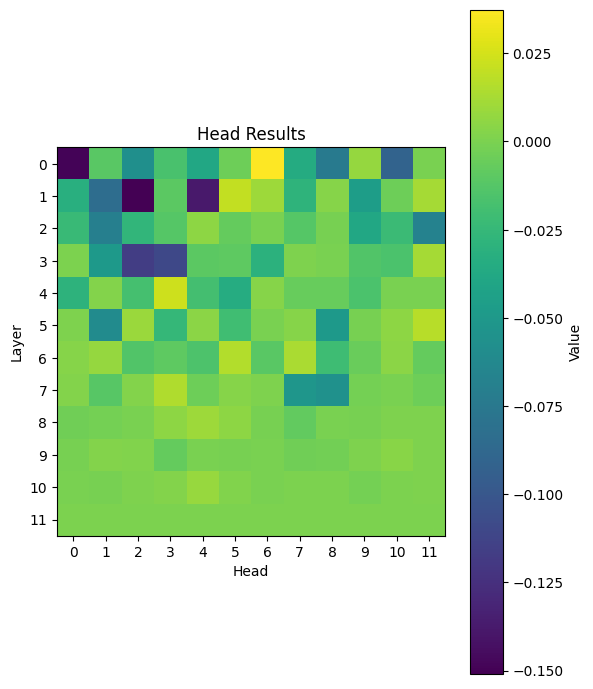

In [11]:
from tf_perturb.viz import plot_head_results
plot_head_results(results['full_self_repair_new'])

(<Figure size 600x700 with 2 Axes>,
 <Axes: title={'center': 'Head Results'}, xlabel='Head', ylabel='Layer'>)

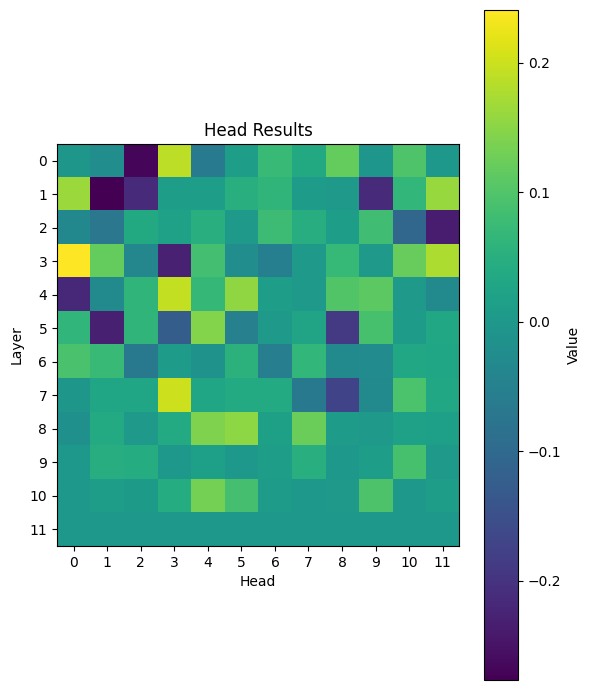

In [12]:
plot_head_results(results['condensed_self_repair_new'])

(<Figure size 600x700 with 2 Axes>,
 <Axes: title={'center': 'Head Results'}, xlabel='Head', ylabel='Layer'>)

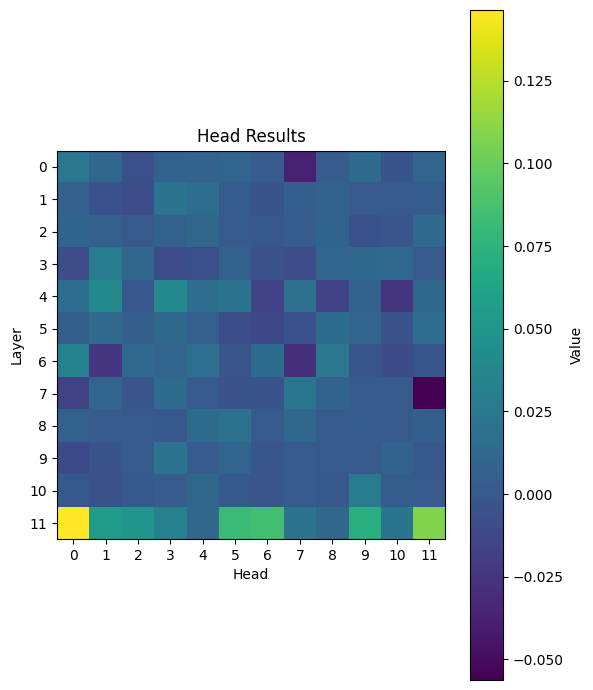

In [13]:
from tf_perturb.viz import plot_head_results
plot_head_results(results['full_direct_effects'])